In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_race_2020 = pd.read_csv('../data/house_rep_data_final.csv')

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  

In [3]:
house_race_2020

,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
0,Doug Jones,D,39.6,Alabama,2020,True,False,"30,640,635","32,297,767"
1,Tommy Tuberville,R,60.2,Alabama,2020,False,True,"8,537,218","8,363,739"
2,Michael Parrish,I,0.0,Alabama,2020,False,False,"5,116","2,639"
3,Jerry Carl,R,64.9,Alabama,1,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,1,False,False,"80,095","78,973"
...,...,...,...,...,...,...,...,...,...
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,"416,978","399,916"
1014,Cynthia Lummis,R,72.8,Wyoming,2020,False,True,"2,547,033","2,581,058"
1015,Merav Ben,D,26.8,Wyoming,2020,False,False,"542,570","528,292"
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,"3,003,883","3,060,167"


In [4]:
house_race_2020 = house_race_2020.loc[house_race_2020['District']!="2020"]
#drop "Senate" from district column
house_race_2020

,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
3,Jerry Carl,R,64.9,Alabama,1,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,1,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,2,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,2,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,3,True,True,"1,193,111","1,218,564"
...,...,...,...,...,...,...,...,...,...
1011,Tricia Zunker,D,39.2,Wisconsin,07,False,False,"1,261,957","1,232,690"
1012,Mike Gallagher,R,64.0,Wisconsin,08,True,True,"3,202,905","2,841,801"
1013,Amanda Stuck,D,36.0,Wisconsin,08,False,False,"416,978","399,916"
1016,Liz Cheney,R,68.6,Wyoming,01,True,True,"3,003,883","3,060,167"


In [5]:
house_race_2020['District'] = house_race_2020['District'].str.zfill(2)
house_race_2020.head()

C:\Users\briga\AppData\Local\Temp\ipykernel_25096\186559947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_race_2020['District'] = house_race_2020['District'].str.zfill(2)


,Candidate,Party,Vote Percentage,State,District,Incumbent,Winner,Money Raised,Money Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [6]:
house_race_2020=house_race_2020.rename(columns={'Vote Percentage':'Vote','Money Raised':'Raised', 'Money Spent':'Spent'})
house_race_2020.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,"1,971,321","1,859,349"
4,James Averhart,D,35.0,Alabama,01,False,False,"80,095","78,973"
5,Barry Moore,R,65.3,Alabama,02,False,True,"650,807","669,368"
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,"56,050","55,988"
7,Mike D,R,67.5,Alabama,03,True,True,"1,193,111","1,218,564"


In [7]:
house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_25096\1150013449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Raised'] = house_race_2020['Raised'].str.replace('\$|,','').apply(int)


In [8]:
house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)

C:\Users\briga\AppData\Local\Temp\ipykernel_25096\4283798421.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  house_race_2020['Spent']= house_race_2020['Spent'].str.replace('\$|,','').apply(int)


In [9]:
print(house_race_2020.info())
house_race_2020.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 3 to 1017
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Candidate  924 non-null    object 
 1   Party      924 non-null    object 
 2   Vote       924 non-null    float64
 3   State      924 non-null    object 
 4   District   924 non-null    object 
 5   Incumbent  924 non-null    bool   
 6   Winner     924 non-null    bool   
 7   Raised     924 non-null    int64  
 8   Spent      924 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 59.6+ KB
None


,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
3,Jerry Carl,R,64.9,Alabama,01,False,True,1971321,1859349
4,James Averhart,D,35.0,Alabama,01,False,False,80095,78973
5,Barry Moore,R,65.3,Alabama,02,False,True,650807,669368
6,Phyllis Harvey-Hall,D,34.6,Alabama,02,False,False,56050,55988
7,Mike D,R,67.5,Alabama,03,True,True,1193111,1218564
8,Adia Winfrey,D,32.4,Alabama,03,False,False,50273,40971
9,Robert B,R,82.5,Alabama,04,True,True,1255076,1323812
10,Mo Brooks,R,95.8,Alabama,05,True,True,655365,210045
11,Gary Palmer,R,97.1,Alabama,06,True,True,907219,909082
12,Terri Sewell,D,97.2,Alabama,07,True,True,2168165,1495957


export to clean up

In [10]:
house_race_2020.to_csv('../data/house_race_2020.csv')

import cleaned file

In [11]:
house_race_2020_clean = pd.read_csv('../data/house_race_2020_clean.csv')
house_race_2020_clean.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,1,False,True,1971321,1859349
1,James Averhart,D,35.0,Alabama,1,False,False,80095,78973
2,Barry Moore,R,65.3,Alabama,2,False,True,650807,669368
3,Phyllis Harvey-Hall,D,34.6,Alabama,2,False,False,56050,55988
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564


In [12]:
house_race_2020_clean.loc[house_race_2020_clean['Vote']<=20]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
24,Tom Lewellen,I,0.0,Arizona,6,False,False,11685,11000
62,Nikka Piterman,R,9.6,California,13,False,False,9839,9904
107,Errol Webber,R,14.1,California,37,False,False,66398,174076
140,Alex Johnson,I,0.0,Colorado,2,False,False,4782,4093
143,Chris Milton,3,1.0,Colorado,3,False,False,12012,12012
...,...,...,...,...,...,...,...,...,...
825,Jonia Broderick,3,2.1,Utah,4,False,False,21394,21265
843,Heerak Christian,I,0.0,Virginia,8,False,False,2036,1921
849,Stevan Porter,L,0.0,Virginia,11,False,False,533,1316
863,Craig Keller,R,16.7,Washington,7,False,False,2904,3703


#Q: What is the average amount raised/spent by winning candidates?

In [13]:
winners = house_race_2020_clean.loc[house_race_2020_clean['Winner']==True]
winners.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
0,Jerry Carl,R,64.9,Alabama,1,False,True,1971321,1859349
2,Barry Moore,R,65.3,Alabama,2,False,True,650807,669368
4,Mike D,R,67.5,Alabama,3,True,True,1193111,1218564
6,Robert B,R,82.5,Alabama,4,True,True,1255076,1323812
7,Mo Brooks,R,95.8,Alabama,5,True,True,655365,210045


In [14]:
#check that no winners had less than 45% of vote
winners.loc[winners['Vote']<=45]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent


In [15]:
print(winners['Raised'].mean().astype(int))
print(winners['Spent'].mean().astype(int))

2723756
2365585


In [16]:
winners.groupby('Incumbent')[('Raised','Spent')].describe().applymap(lambda x: f"${x:0.0f}")

C:\Users\briga\AppData\Local\Temp\ipykernel_25096\1899305353.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  winners.groupby('Incumbent')[('Raised','Spent')].describe().applymap(lambda x: f"${x:0.0f}")


Raised                                                             \
           count      mean       std      min       25%       50%       75%   
Incumbent                                                                     
False        $64  $2896162  $2057750  $257174  $1646275  $2282488  $3425638   
True        $371  $2694016  $3860851  $327727  $1051494  $1634783  $2750440   

                     Spent                                                   \
                 max count      mean       std      min       25%       50%   
Incumbent                                                                     
False      $11239670   $64  $2733950  $2036335   $95065  $1631846  $2134520   
True       $37262827  $371  $2302040  $3184801  $190158   $914340  $1384765   

                                
                75%        max  
Incumbent                       
False      $3368594  $10947106  
True       $2335746  $32830607

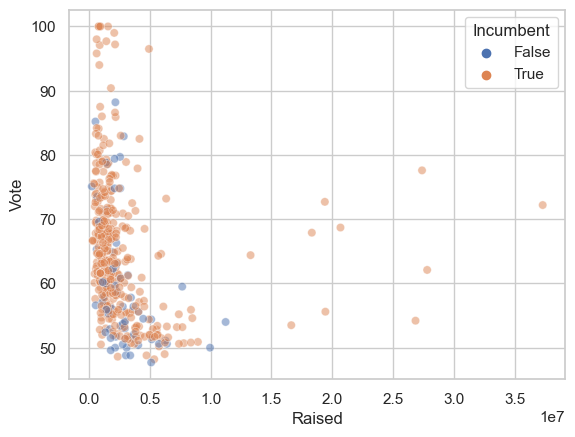

In [17]:
sns.set(style='whitegrid')

 
sns.scatterplot(x="Raised",
                    y="Vote",
                    hue= "Incumbent",
                    data=winners,
                    alpha=0.5);

In [18]:
losers = house_race_2020_clean.loc[house_race_2020_clean['Winner']==False]
losers.head()

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
1,James Averhart,D,35.0,Alabama,1,False,False,80095,78973
3,Phyllis Harvey-Hall,D,34.6,Alabama,2,False,False,56050,55988
5,Adia Winfrey,D,32.4,Alabama,3,False,False,50273,40971
11,Alyse Galvin,I,45.3,Alaska,1,False,False,5178452,5088103
13,Tiffany Shedd,R,48.4,Arizona,1,False,False,1675618,1615704


In [19]:
#The guy who died from Covid before he was sworn in...
losers.loc[losers['Vote']>50]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
356,Luke Letlow,R,62.0,Louisiana,5,False,False,1392822,1303757


In [20]:
losers.loc[losers['Raised']>5500000]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
23,Hiral Tipirneni,D,47.8,Arizona,6,False,False,6301073,6366702
75,TJ Cox,D,49.6,California,21,True,False,5695157,5694005
84,Christy Smith,D,50.0,California,25,False,False,5977734,5808477
118,Joe Collins,R,28.3,California,43,False,False,10556626,9921103
125,Harley Rouda,D,48.9,California,48,True,False,5968858,6174443
130,Ammar Campa-Najjar,D,46.0,California,50,False,False,6248210,6247762
224,Debbie Mucarsel-Powell,D,48.3,Florida,26,True,False,6793521,6822740
322,Abby Finkenauer,D,48.7,Iowa,1,True,False,5901441,5875405
381,Kimberly Klacik,R,28.1,Maryland,7,False,False,8296845,7499454
437,Lacy Johnson,R,25.8,Minnesota,5,False,False,12050564,12000896


In [21]:
#notable zeros... Dan McCready raised over $7M and had zero bc of 2019 special election listed in 2020 cycle. 

In [22]:
print(losers['Raised'].mean().astype(int))
print(losers['Spent'].mean().astype(int))

1077564
1064141


In [23]:
losers.groupby('Incumbent').describe().applymap(lambda x: f"{x:0.0f}")

Vote                              District       ...   Raised  \
          count mean std min 25% 50% 75% max    count mean  ...      75%   
Incumbent                                                   ...            
False       446   29  16   0  21  35  41  62      446   10  ...   910156   
True         13   47   3  40  47  49  49  50       13   16  ...  6793521   

                    Spent                                               \
                max count     mean      std      min      25%      50%   
Incumbent                                                                
False      12050564   446   920659  1786120        0    23636   119766   
True        9284434    13  5986699  1788965  2867577  5555591  5875405   

                              
               75%       max  
Incumbent                     
False       861043  12000896  
True       6822740   9499242  

[2 rows x 32 columns]

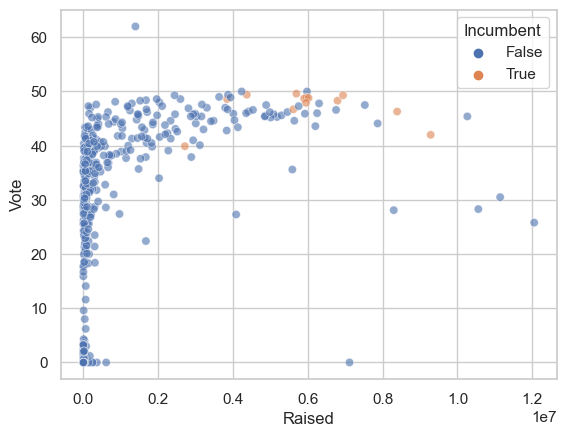

In [24]:
sns.scatterplot(x="Raised",
                    y="Vote",
                    hue= "Incumbent",
                    data=losers,
                    alpha=0.6);

In [25]:
losers.loc[losers.Incumbent.isin([True])]

,Candidate,Party,Vote,State,District,Incumbent,Winner,Raised,Spent
75,TJ Cox,D,49.6,California,21,True,False,5695157,5694005
109,Gil Cisneros,D,49.4,California,39,True,False,4370133,4350464
125,Harley Rouda,D,48.9,California,48,True,False,5968858,6174443
224,Debbie Mucarsel-Powell,D,48.3,Florida,26,True,False,6793521,6822740
226,Donna Shalala,D,48.6,Florida,27,True,False,3842907,3735966
322,Abby Finkenauer,D,48.7,Iowa,1,True,False,5901441,5875405
442,Collin Peterson,D,39.9,Minnesota,7,True,False,2714012,2867577
509,Xochitl Torres,D,46.3,New Mexico,2,True,False,8387337,8539065
536,Max Rose,D,42.0,New York,11,True,False,9284434,9499242
558,Anthony Brindisi,D,48.8,New York,22,True,False,6020190,5772429


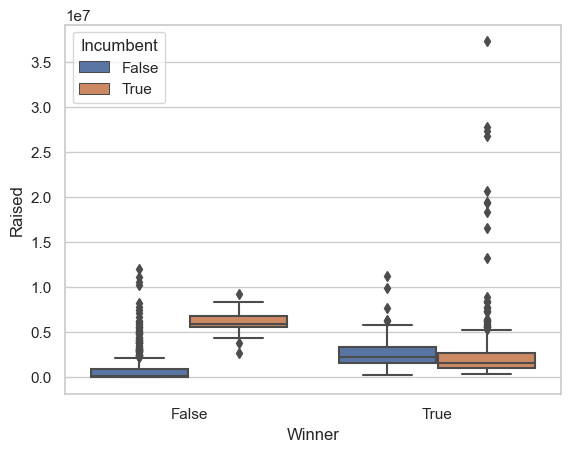

In [26]:
sns.boxplot(data=house_race_2020_clean,
           x="Winner",
           y="Raised",
           hue="Incumbent");
            

    a. How often does the candidate who raised more money win a race?  

In [27]:
#set indexes to state and district
house_race_ind = house_race_2020_clean.set_index(["State", "District"])
#house_race_2020_clean.loc[house_race_2020_clean.groupby('State')['District']['Raised'=='Raised.max()]]
house_race_srt= house_race_ind.sort_index(level=['State', 'District'], ascending=[True, True])
house_race_srt.head()

Candidate Party  Vote  Incumbent  Winner   Raised  \
State   District                                                                
Alabama 1                  Jerry Carl     R  64.9      False    True  1971321   
        1              James Averhart     D  35.0      False   False    80095   
        2                 Barry Moore     R  65.3      False    True   650807   
        2         Phyllis Harvey-Hall     D  34.6      False   False    56050   
        3                      Mike D     R  67.5       True    True  1193111   

                    Spent  
State   District           
Alabama 1         1859349  
        1           78973  
        2          669368  
        2           55988  
        3         1218564

In [28]:
house_race_srt['Outraised']=house_race_srt.groupby(['State','District'])['Raised'].transform(max)==house_race_srt['Raised']
house_race_srt.head(10)

Candidate Party  Vote  Incumbent  Winner   Raised  \
State   District                                                                
Alabama 1                  Jerry Carl     R  64.9      False    True  1971321   
        1              James Averhart     D  35.0      False   False    80095   
        2                 Barry Moore     R  65.3      False    True   650807   
        2         Phyllis Harvey-Hall     D  34.6      False   False    56050   
        3                      Mike D     R  67.5       True    True  1193111   
        3                Adia Winfrey     D  32.4      False   False    50273   
        4                    Robert B     R  82.5       True    True  1255076   
        5                   Mo Brooks     R  95.8       True    True   655365   
        6                 Gary Palmer     R  97.1       True    True   907219   
        7                Terri Sewell     D  97.2       True    True  2168165   

                    Spent  Outraised  
State   District                      
Alabama 1         1859349       True  
        1           78973      False  
        2          669368       True  
        2           55988      False  
        3         1218564       True  
        3           40971      False  
        4         1323812       True  
        5          210045       True  
        6          909082       True  
        7         1495957       True

In [76]:
outraised=house_race_srt.groupby('Outraised')['Winner'].value_counts(normalize=True)
outraised

Outraised  Winner
False      False     0.888889
           True      0.111111
True       True      0.882759
           False     0.117241
Name: Winner, dtype: float64

In [30]:
round(383/(383+52)*100,2)

88.05

    b. How often does the candidate who spent more money win a race?  

In [31]:
house_race_srt['Outspent']=house_race_srt.groupby(['State','District'])['Spent'].transform(max)==house_race_srt['Spent']
house_race_srt.head(10)

Candidate Party  Vote  Incumbent  Winner   Raised  \
State   District                                                                
Alabama 1                  Jerry Carl     R  64.9      False    True  1971321   
        1              James Averhart     D  35.0      False   False    80095   
        2                 Barry Moore     R  65.3      False    True   650807   
        2         Phyllis Harvey-Hall     D  34.6      False   False    56050   
        3                      Mike D     R  67.5       True    True  1193111   
        3                Adia Winfrey     D  32.4      False   False    50273   
        4                    Robert B     R  82.5       True    True  1255076   
        5                   Mo Brooks     R  95.8       True    True   655365   
        6                 Gary Palmer     R  97.1       True    True   907219   
        7                Terri Sewell     D  97.2       True    True  2168165   

                    Spent  Outraised  Outspent  
State   District                                
Alabama 1         1859349       True      True  
        1           78973      False     False  
        2          669368       True      True  
        2           55988      False     False  
        3         1218564       True      True  
        3           40971      False     False  
        4         1323812       True      True  
        5          210045       True      True  
        6          909082       True      True  
        7         1495957       True      True

In [75]:
outspent=house_race_srt.groupby('Outspent')['Winner'].value_counts(normalize=True)
outspent

Outspent  Winner
False     False     0.882353
          True      0.117647
True      True      0.875862
          False     0.124138
Name: Winner, dtype: float64

In [33]:
round(380/(380+55)*100,2)

87.36

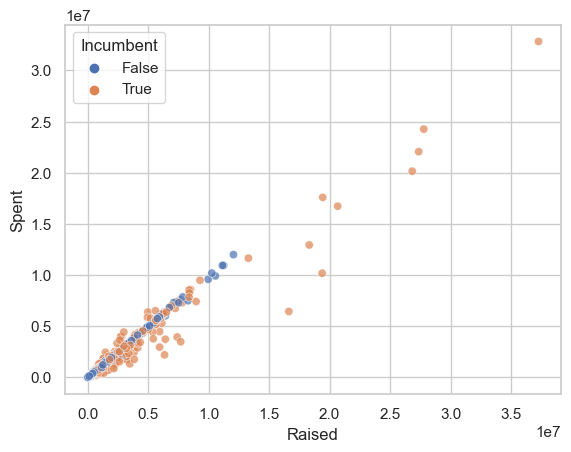

In [34]:
sns.scatterplot(data=house_race_srt, 
                x='Raised', 
                y='Spent', 
                hue='Incumbent', 
                alpha=0.7);

    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  

In [35]:
house_race_srt['Raised_Diff']=house_race_srt.groupby(['State','District'])['Raised'].transform(max)-house_race_srt['Raised']
house_race_srt.head(15)

Candidate Party  Vote  Incumbent  Winner   Raised  \
State   District                                                                
Alabama 1                  Jerry Carl     R  64.9      False    True  1971321   
        1              James Averhart     D  35.0      False   False    80095   
        2                 Barry Moore     R  65.3      False    True   650807   
        2         Phyllis Harvey-Hall     D  34.6      False   False    56050   
        3                      Mike D     R  67.5       True    True  1193111   
        3                Adia Winfrey     D  32.4      False   False    50273   
        4                    Robert B     R  82.5       True    True  1255076   
        5                   Mo Brooks     R  95.8       True    True   655365   
        6                 Gary Palmer     R  97.1       True    True   907219   
        7                Terri Sewell     D  97.2       True    True  2168165   
Alaska  1                   Don Young     R  54.4       True    True  1922901   
        1                Alyse Galvin     I  45.3      False   False  5178452   
Arizona 1              Tom O'Halleran     D  51.6       True    True  3381353   
        1               Tiffany Shedd     R  48.4      False   False  1675618   
        2             Ann Kirkpatrick     D  55.1       True    True  1849862   

                    Spent  Outraised  Outspent  Raised_Diff  
State   District                                             
Alabama 1         1859349       True      True            0  
        1           78973      False     False      1891226  
        2          669368       True      True            0  
        2           55988      False     False       594757  
        3         1218564       True      True            0  
        3           40971      False     False      1142838  
        4         1323812       True      True            0  
        5          210045       True      True            0  
        6          909082       True      True            0  
        7         1495957       True      True            0  
Alaska  1         1790448      False     False      3255551  
        1         5088103       True      True            0  
Arizona 1         3324138       True      True            0  
        1         1615704      False     False      1705735  
        2         1384765       True      True            0

In [36]:
fundraising_diff=house_race_srt.groupby('Winner')['Raised_Diff']
fundraising_diff

In [78]:
#incumbent story:
house_race_srt[house_race_srt['Incumbent']==True].describe().applymap(lambda x: f"${x:0.0f}")

,Vote,Raised,Spent,Raised_Diff,Cand_Count,Vote_Diff
count,$384,$384,$384,$384,$384,$384
mean,$65,$2804591,$2426781,$139835,$2,$28
std,$11,$3852916,$3216237,$798767,$1,$23
min,$40,$327727,$190158,$0,$1,$0
25%,$56,$1067487,$926156,$0,$2,$7
50%,$63,$1696782,$1459538,$0,$2,$25
75%,$70,$3004112,$2809456,$0,$2,$45
max,$100,$37262827,$32830607,$8719966,$4,$100


In [41]:
house_race_srt['Cand_Count']=house_race_srt.groupby(['State', 'District'])['Candidate'].transform('count')

In [42]:
unopposed_inc= house_race_srt[(house_race_srt['Incumbent']==True)&(house_race_srt['Cand_Count']==1)]

In [47]:
unopposed_inc.shape

(55, 11)

In [79]:
unopposed_inc.describe().applymap(lambda x: f"${x:0.0f}")

,Vote,Raised,Spent,Raised_Diff,Cand_Count
count,$55,$55,$55,$55,$55
mean,$78,$2320567,$1947398,$0,$1
std,$12,$4943789,$4369327,$0,$0
min,$52,$593735,$210045,$0,$1
25%,$69,$921894,$768791,$0,$1
50%,$75,$1246008,$1095518,$0,$1
75%,$83,$1861483,$1745802,$0,$1
max,$100,$37262827,$32830607,$0,$1


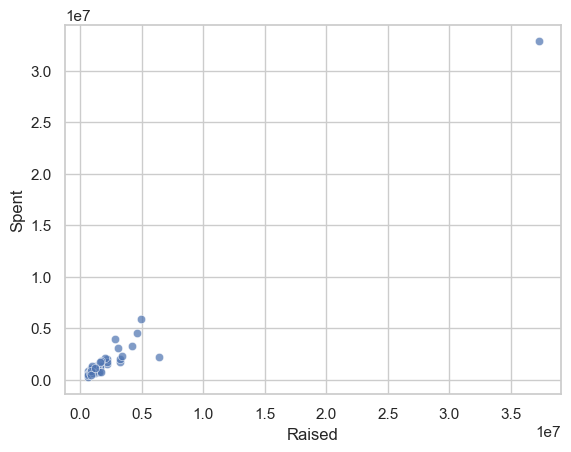

In [49]:
sns.scatterplot(data=unopposed_inc, 
                x='Raised', 
                y='Spent', 
                alpha=0.7);

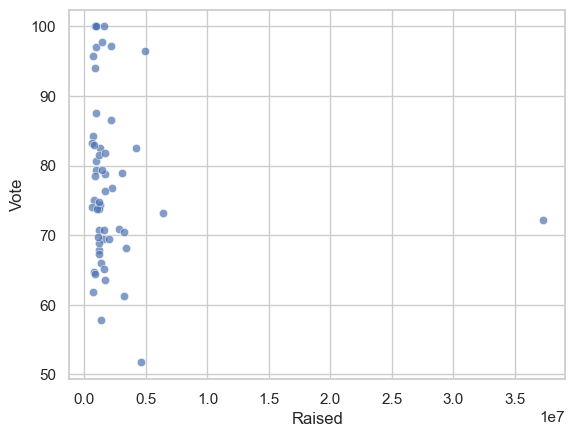

In [50]:
#unopposed incumbents
sns.scatterplot(data=unopposed_inc, 
                x='Raised', 
                y='Vote', 
                alpha=0.7);

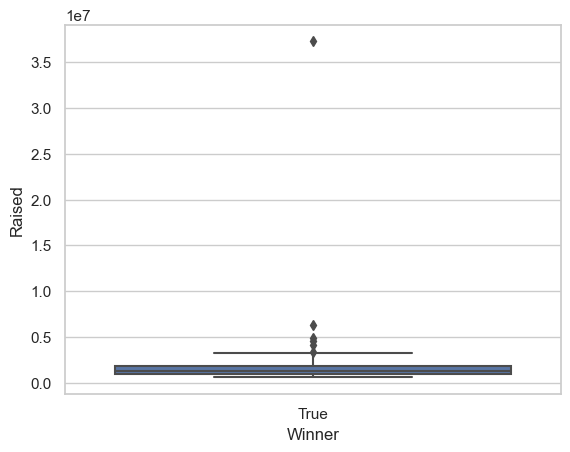

In [80]:
sns.boxplot(data=unopposed_inc,
           x="Winner",
           y="Raised");
            

In [51]:
challenged_inc= house_race_srt[(house_race_srt['Incumbent']==True)&(house_race_srt['Cand_Count']>=2)]

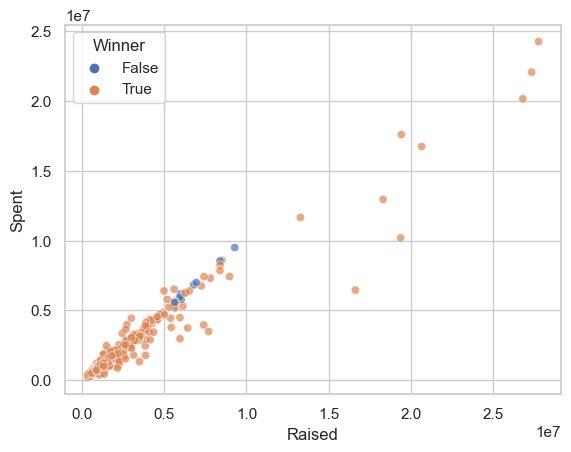

In [54]:
#challenged incumbents
sns.scatterplot(data=challenged_inc, 
                x='Raised', 
                y='Spent', 
                hue='Winner',
                alpha=0.7);

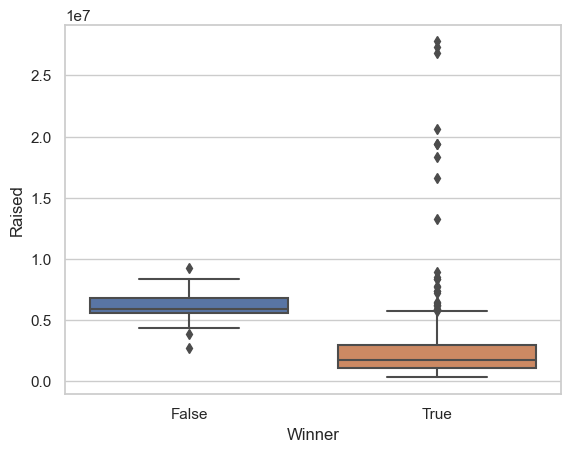

In [68]:
sns.boxplot(data=challenged_inc,
           x="Winner",
           y="Raised");
            

In [73]:
challenged_inc.groupby("Winner")["Raised"].describe().applymap(lambda x: f"${x:0.0f}")

,count,mean,std,min,25%,50%,75%,max
Winner,,,,,,,,
False,$13,$5960237,$1740355,$2714012,$5613542,$5949800,$6793521,$9284434
True,$316,$2759015,$3645593,$327727,$1086593,$1762769,$2941978,$27780644


In [59]:
#close races decided by less than 10%
house_race_srt['Vote_Diff']=house_race_srt.groupby(['State','District'])['Vote'].transform(lambda x: x.max()-x.min())
mult_cand_race= house_race_srt[(house_race_srt['Cand_Count']>=2)]
close_races = mult_cand_race[mult_cand_race['Vote_Diff'].abs() <= 10]
close_races

Candidate Party  Vote  Incumbent  Winner   Raised  \
State      District                                                           
Alaska     1              Don Young     R  54.4       True    True  1922901   
           1           Alyse Galvin     I  45.3      False   False  5178452   
Arizona    1         Tom O'Halleran     D  51.6       True    True  3381353   
           1          Tiffany Shedd     R  48.4      False   False  1675618   
California 3         John Garamendi     D  54.7       True    True  1054066   
...                             ...   ...   ...        ...     ...      ...   
Virginia   7           Nick Freitas     R  49.0      False   False  3629431   
Washington 8            Kim Schrier     D  51.7       True    True  5422491   
           8           Jesse Jensen     R  48.1      False   False   852396   
Wisconsin  3               Ron Kind     D  51.4       True    True  2989262   
           3            Derrick Van     R  48.6      False   False  1962443   

                       Spent  Outraised  Outspent  Raised_Diff  Cand_Count  \
State      District                                                          
Alaska     1         1790448      False     False      3255551           2   
           1         5088103       True      True            0           2   
Arizona    1         3324138       True      True            0           2   
           1         1615704      False     False      1705735           2   
California 3          667320       True      True            0           2   
...                      ...        ...       ...          ...         ...   
Virginia   7         3600108      False     False      4758249           2   
Washington 8         3774398       True      True            0           2   
           8          842269      False     False      4570095           2   
Wisconsin  3         4435403       True      True            0           2   
           3         1948639      False     False      1026819           2   

                     Vote_Diff  
State      District             
Alaska     1               9.1  
           1               9.1  
Arizona    1               3.2  
           1               3.2  
California 3               9.4  
...                        ...  
Virginia   7               1.8  
Washington 8               3.6  
           8               3.6  
Wisconsin  3               2.8  
           3               2.8  

[125 rows x 12 columns]

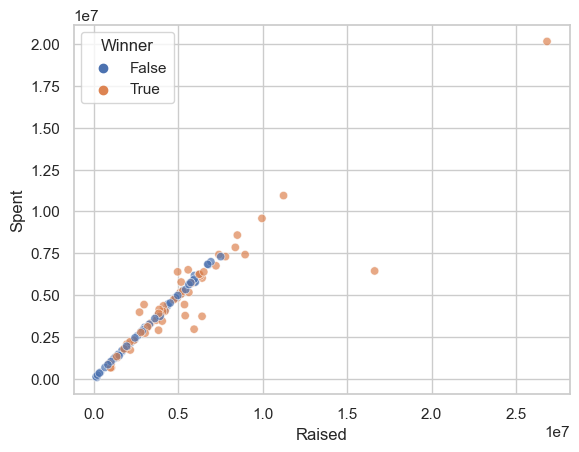

In [60]:
#close race spending
sns.scatterplot(data=close_races, 
                x='Raised', 
                y='Spent', 
                hue='Winner',
                alpha=0.7);

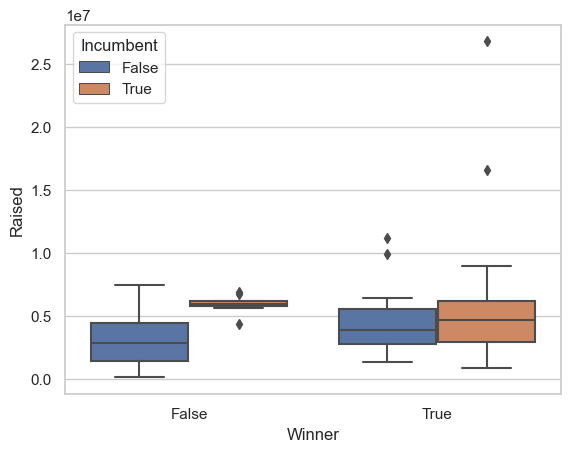

In [63]:
#close races
sns.boxplot(data=close_races,
           x="Winner",
           y="Raised",
           hue="Incumbent");
            

    d. How often does the incumbent candidate win a race?  

    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?